In [1]:
#ecrire une introduction d'explication du probleme  traité de facon brève (version explicite dans le document readme)

In [8]:
%run load_preprocessing.ipynb

In [10]:
user_segment = pd.read_excel("user_segments.xls" , header = 0)

General overview of the user_segment dataframe

In [11]:
print("preview of the file :")
print("--------------Head of file---------------------------")
print(user_segment.head())
print("===================================================")
print("shape of the file :")
print("number of columns :" , user_segment.shape[1])
print("columns names and types:")
print(user_segment.dtypes)
print("number of lines :" , user_segment.shape[0])
print("===================================================")
print("Missing values percentage")
print(percent_missing_values(user_segment))

preview of the file :
--------------Head of file---------------------------
   ID  ANIMAL  CAR_OWNER  GARDEN  OFFICE_WORKER  PARENT
0   0    True      False   False           True    True
1   1   False      False   False           True   False
2   2   False      False    True          False   False
3   3   False       True   False          False   False
4   4   False       True   False          False   False
shape of the file :
number of columns : 6
columns names and types:
ID               int64
ANIMAL            bool
CAR_OWNER         bool
GARDEN            bool
OFFICE_WORKER     bool
PARENT            bool
dtype: object
number of lines : 500
Missing values percentage
ID               0.0
ANIMAL           0.0
CAR_OWNER        0.0
GARDEN           0.0
OFFICE_WORKER    0.0
PARENT           0.0
dtype: float64


As we can see there is no missing values in our excel file containing the "user_segments" data , it will ease our work a little bit

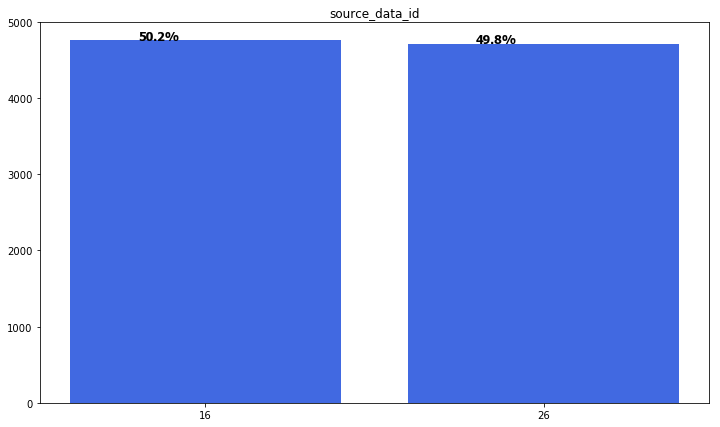

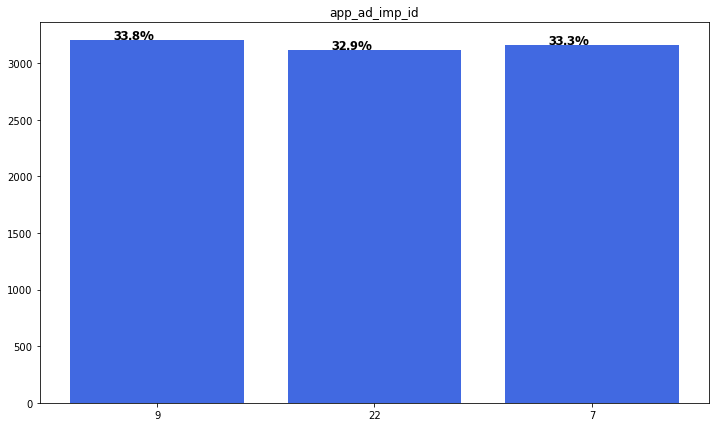

In [54]:

def modality_percentage(dataframe , colname):
    modalities = dataframe[colname].tolist()
    
    modalities_name = list(set(modalities))
    modalities_frequency = occurency(modalities)
    
    modalities_occurency = [item[1] for item in modalities_frequency]
    
    font = matplotlib.font_manager.FontProperties(family='Tahoma', 
        weight='extra bold', size=12)
    x = range(0 , len(modalities_occurency))
    fig = plt.figure(figsize = (12,7))
    plt.title(colname)
    plt.bar(x , modalities_occurency , color = "royalblue")
    for xy in zip(x , modalities_occurency):
            plt.annotate(str(round((xy[1]/sum(modalities_occurency))*100 , 1))+ '%', xy=(xy[0] - 0.2 , xy[1] + 10), textcoords='data',
                         fontproperties = font)

    plt.xticks(x , modalities_name)
       
    return modalities_name
    

colnames = ['content_id' , 'os_user_device_id' , 'source_data_id' ,'app_ad_imp_id' , 'conversion']

dbase = campaign_impressions("campaign_impressions.json" , 'ANIMAL')
modality_percentage(dbase, 'app_ad_imp_id')

for colname in colnames:
    modality_percentage(dbase, colname)
    





"modality_percentage" is a function that is used to have better view of the distribution of multi-modal variable for each modality , moreover it has been thought to help define the "profil" of the "sensitive client" to the ad campaign in the conlusion of the project

Accordin to the percentage it will be a client exposed to the content_id number 7 with the app_ad_imp_id 9 with os_user_id 4 

In [53]:
def modality_conversion(dataframe , feature_name , segment_name):
    modalities_name = list(set(dataframe[feature_name]))
    
    for modalitie_name in modalities_name:
        lst = []
        subdataframe = dataframe[dataframe[feature_name] == modalitie_name][[feature_name , segment_name , 'conversion']]
       
        modalities_segment_name = list(set(subdataframe[segment_name].tolist()))
        for modalitie_segment_name in modalities_segment_name:
            subbdataframe = subdataframe[subdataframe[segment_name] == modalitie_segment_name]
            
            modalities_conversion = subbdataframe['conversion'].tolist()
            
            modalitie_conversion_percentage = [str(round(item[1]/len(modalities_conversion)*100 , 1)) +'%' for item in occurency(modalities_conversion)]
            
            
            lst.append([modalitie_name] + [modalitie_segment_name] + modalitie_conversion_percentage)

        dframe = pd.DataFrame(lst , columns = [feature_name , segment_name , 'False' , 'True'])
        print(dframe)
        print("=========================")
        
        
#segment_name = 'PARENT'

colnames = ['content_id' , 'os_user_device_id' , 'source_data_id' ,'app_ad_imp_id']

segment_names = [item for item in list(user_segment.columns)]


#extraction of the 'id' feature because it will cause an issue to run the function
segment_names.pop(0)

for segment_name in segment_names:
    dbase = campaign_impressions("campaign_impressions.json" , segment_name)
    for colname in colnames:
        modality_conversion(dbase , colname , segment_name.lower())
        print("======================================")
    print("##############################################################")



   

   content_id  animal  False   True
0         1.0   False  72.3%  27.7%
1         1.0    True  65.7%  34.3%
   content_id  animal  False   True
0         2.0   False  69.8%  30.2%
1         2.0    True  67.7%  32.3%
   content_id  animal  False   True
0         3.0   False  71.9%  28.1%
1         3.0    True  68.4%  31.6%
   content_id  animal  False   True
0         4.0   False  68.0%  32.0%
1         4.0    True  67.4%  32.6%
   content_id  animal  False   True
0         5.0   False  72.7%  27.3%
1         5.0    True  65.8%  34.2%
   content_id  animal  False   True
0         6.0   False  70.4%  29.6%
1         6.0    True  64.7%  35.3%
   content_id  animal  False   True
0         7.0   False  67.4%  32.6%
1         7.0    True  71.4%  28.6%
   content_id  animal  False   True
0         8.0   False  71.1%  28.9%
1         8.0    True  66.8%  33.2%
   content_id  animal  False   True
0         9.0   False  70.1%  29.9%
1         9.0    True  70.2%  29.8%
   content_id  animal  False

   app_ad_imp_id  office_worker  False   True
0             22          False  66.9%  33.1%
1             22           True  72.7%  27.3%
   app_ad_imp_id  office_worker  False   True
0              7          False  67.0%  33.0%
1              7           True  71.8%  28.2%
##############################################################
   content_id  parent  False   True
0         1.0   False  71.9%  28.1%
1         1.0    True  66.7%  33.3%
   content_id  parent  False   True
0         2.0   False  72.7%  27.3%
1         2.0    True  64.0%  36.0%
   content_id  parent  False   True
0         3.0   False  75.2%  24.8%
1         3.0    True  63.5%  36.5%
   content_id  parent  False   True
0         4.0   False  70.6%  29.4%
1         4.0    True  64.1%  35.9%
   content_id  parent  False   True
0         5.0   False  73.5%  26.5%
1         5.0    True  65.1%  34.9%
   content_id  parent  False   True
0         6.0   False  73.9%  26.1%
1         6.0    True  60.4%  39.6%
   content_id

"modality_conversion" is a function that is specifically designed to find out what is the percentage of the "in store conversioné based on the segment and general information available in the log file

##### commentaries

It seems that in average the most relevant feautres by crossing the two files seems that not being a parent and having data coming from the source 16 or 26 

In [14]:
#data separation 
#target feature isolation
target = dbase['conversion']

#standardization of the model features
features = dbase.drop('conversion' , 1)
features = features.drop('user_id' , 1)
features = features.drop('timestamp' , 1)



In [15]:
#binarization of the target value
target_binarized = binary_coding(dbase['conversion'] , 1)

conversion of the target variable into a useful variable for the up coming models

In [16]:
#enregistrement du modèle
import pickle

#storing model
def model_registering(model_type , model_name):
    with open(model_name , 'wb') as model:
        pickle.dump( model_type , model)

#opening stored model
def model_opening(model_type , model_name):
    with open(model_name , 'rb') as model:
        model_type = pickle.load(model)
    return model_type

"model_registering" and "model_opening" are function made to store the model and avoid to re run it , meaning to have to learn from the new data and save time if we decide to push this analysis to production


##### which machine learning model to choose?

The project is about to mdelize a binomial outcome , two ways type of situation , we need to measure the relationship between the categorical dependent variable ond one or more independent variables by estimating probabilities.
The Logistic Regression is pretty good candidate

An alternative is to randomly affected into classes the binomial outcome according to the variables , a Random Tree.
To shape that approach and avoid the bias and variance issue , it is going to be needed to to confront an ensemble of decisions trees , by using the Random Forest

bias : A statistic is biased if it is calculated in such a way that it is systematically different from the population parameter being estimated

variance : this is a measure used to estimate the distribution of the sample

Others machine learning algorithm to take a closer look at should the Naive Bayes , that also deals really well with the bias/variance part inherant to the data

In [62]:
import numpy as np
#RandomForest modeling

#splitting of the database into train / test
#train portion of the data to find the pattern
#test portion of the data to test the validity of your model

#train / test ratio of 66% vs 33%

x_train , x_test , y_train , y_test = train_test_split(features , target_binarized , test_size = 0.33 , random_state = 1)

criterions = ['gini' , 'entropy']

for criterion in criterions:
    Classifier = RandomForestClassifier(n_estimators = 500 , criterion = criterion)
    Classifier.fit(x_train , y_train)
    predictions = Classifier.predict(x_test)
    
    importances = Classifier.feature_importances_
    
    std = np.std([tree.feature_importances_ for tree in Classifier.estimators_] , axis = 0)
    
    indices = np.argsort(importances)[::-1]
    
    lst = []
    for f in range(x_test.shape[1]):
     
        lst.append([f+1 , features.columns[indices[f]]   , importances[indices[f]]])
    dframe = pd.DataFrame(lst , columns = ['index' , 'feature names' , 'weight'])
    
    print(dframe)
    print("----------------------------------------------------------")
    
    average_prob_classes = sum(Classifier.predict_proba(x_test))/len(Classifier.predict_proba(x_test))
    print("probabilities : class False "+str(round(average_prob_classes[0] , 3)) + " , class True "+str(round(average_prob_classes[1] , 3)))
    
    print("----------------------------------------------------------")
#
##model evaluation
    accuracy  = metrics.accuracy_score(y_test , predictions)
    matrix_confusion = metrics.confusion_matrix(y_test , predictions)

    print('confusion matrix:' , matrix_confusion)

    print('precision ratio:' , str(round(accuracy , 3)*100)+ '%')
    print('error ratio : ' , str(round(1-accuracy , 3)*100) + '%')
    
    print('mean accuracy :', str(round(Classifier.score(features , target) , 3)*100)+'%')
    
    print("=========================================================")
    
    #model_registering(Classifier , "RF_model")
    #print("model registerd")


   index       feature names    weight
0      1          content_id  0.448283
1      2   os_user_device_id  0.217958
2      3  ad_campaign_imp_id  0.122672
3      4       app_ad_imp_id  0.113494
4      5      source_data_id  0.053070
5      6              animal  0.044522
6      7      ad_campaign_id  0.000000
----------------------------------------------------------
probabilities : class False 0.698 , class True 0.302
----------------------------------------------------------
confusion matrix: [[1877  276]
 [ 753  220]]
precision ratio: 67.1%
error ratio :  32.9%
mean accuracy : 71.0%
   index       feature names    weight
0      1          content_id  0.467948
1      2   os_user_device_id  0.194425
2      3  ad_campaign_imp_id  0.120298
3      4       app_ad_imp_id  0.119674
4      5      source_data_id  0.053868
5      6              animal  0.043788
6      7      ad_campaign_id  0.000000
----------------------------------------------------------
probabilities : class False 0.698 ,

As we can see in the Random Forest the most important features according to the weight seems to be : "content_id" , "os_user_device_id" 
    

The fact that the os_user_device_id is relevant can be related to the fact that some operational system a more spread than others

For each criterion the accuracy seems to be the same , others score that we could check is the RMSE (Root Mean Square Errors) that particularly focus 
on the bias/variance duo for any model with varieties of parameters , the best one is always the one with the lowest score

In [63]:
x_train , x_test , y_train , y_test = train_test_split(features , target_binarized , test_size = 0.33 , random_state = 1)

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']

for solver in solvers:
    Logreg = linear_model.LogisticRegression(C=1e5 , solver=solver)
    Logreg.fit(x_train , y_train)
    predictions = Logreg.predict(x_test)
    
   
    average_prob_classes = sum(Logreg.predict_proba(x_test))/len(Logreg.predict_proba(x_test))
    print("probabilities : class False "+str(round(average_prob_classes[0] , 3)) + " , class True "+str(round(average_prob_classes[1] , 3)))

    ##model evaluation
    accuracy  = metrics.accuracy_score(y_test , predictions)

    print('precision ratio:' , str(round(accuracy,3)*100)+'%')
    print('error ratio : ' , str(round(1-accuracy , 3)*100)+'%')
    
    print('mean accuracy :', str(round(Logreg.score(features , target) , 3)*100)+'%')
    print("==================================================")
    
    #model_registering(Logreg , "RL_model")
    #print("model registerd")

probabilities : class False 0.695 , class True 0.305
precision ratio: 68.9%
error ratio :  31.1%
mean accuracy : 69.2%
probabilities : class False 0.695 , class True 0.305
precision ratio: 68.9%
error ratio :  31.1%
mean accuracy : 69.2%
probabilities : class False 0.695 , class True 0.305
precision ratio: 68.9%
error ratio :  31.1%
mean accuracy : 69.2%
probabilities : class False 0.695 , class True 0.305
precision ratio: 68.9%
error ratio :  31.1%
mean accuracy : 69.2%
